# Naive Bayes Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

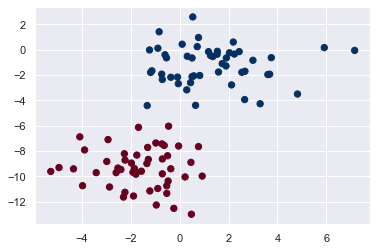

In [2]:
from sklearn.datasets import make_blobs
X , y = make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap = 'RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6,-14]+[14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)

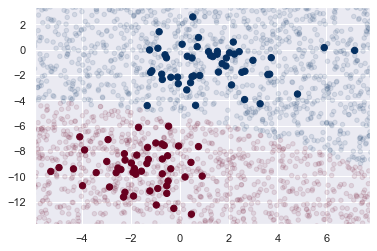

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu',s=40)
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes

In [7]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [8]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [12]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [13]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [14]:
labels = model.predict(test.data)

In [15]:
# evaluation
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

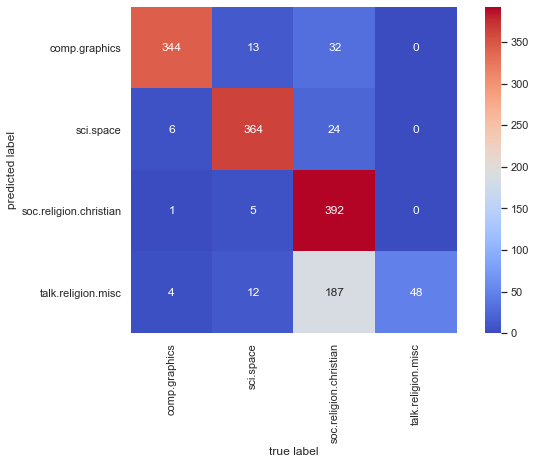

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(mat,square=True,annot=True,cmap='coolwarm',fmt='d',xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [18]:
predict_category('sending a payload to the ISS')

'sci.space'

In [19]:
predict_category('I like islam')

'soc.religion.christian'

In [20]:
predict_category('determining the screen resolution')

'comp.graphics'

In [21]:
predict_category('I always play video games')

'comp.graphics'

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(labels,test.target)

0.8016759776536313

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logistic = make_pipeline(TfidfVectorizer(),LogisticRegression())
logistic.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [25]:
predictions=logistic.predict(test.data)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
accuracy_score(test.target,predictions)

0.8924581005586593

In [28]:
confusion_matrix(test.target,predictions)

array([[374,   8,   4,   3],
       [ 18, 372,   4,   0],
       [ 12,   2, 378,   6],
       [ 24,  13,  60, 154]], dtype=int64)

# Support Vector Machine

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns; sns.set()

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


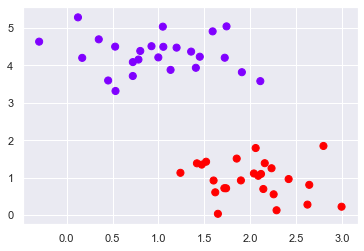

In [30]:
from sklearn.datasets.samples_generator import make_blobs
X , y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.5
                  )
plt.scatter(X[:,0] , X[:,1] , c=y , s = 50 , cmap = 'rainbow')

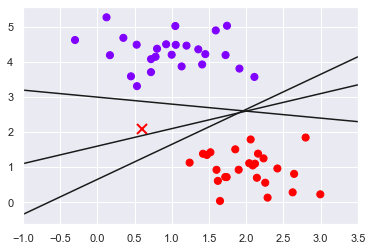

In [31]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.plot([0.6],[2.1],'x',color = 'red',markeredgewidth=2,markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 3)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

(-1, 3.5)

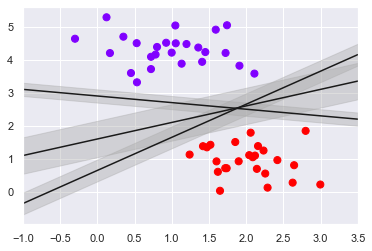

In [32]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
for m , b , d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m* xfit + b
    plt.plot(xfit , yfit , '-k')
    plt.fill_between(xfit , yfit - d , yfit + d , edgecolor = 'none' ,  color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1,3.5)

(-1, 3.5)

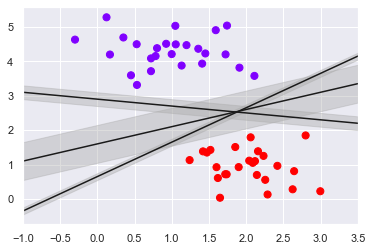

In [33]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
for m , b , d in [(1, 0.65, 0.1), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m* xfit + b
    plt.plot(xfit , yfit , '-k')
    plt.fill_between(xfit , yfit - d , yfit + d , edgecolor = 'none' ,  color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1,3.5)

### Fitting a support vector machine

In [34]:
from sklearn.svm import SVC
model = SVC(C=1E10 , kernel = 'linear')
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [35]:
def plot_SVC_decision (model , ax = None , plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0] , xlim[1] , 30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y , X = np.meshgrid(y,x)

    xy = np.vstack([X.ravel(),Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=50, linewidth=1, facecolors='None',edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

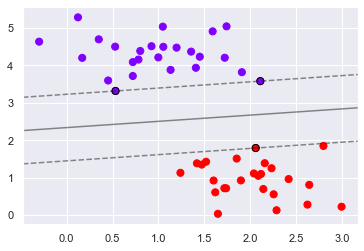

In [36]:
plt.scatter(X[:,0] , X[:,1] , c=y , s=50 , cmap='rainbow')
plot_SVC_decision(model);

In [37]:
print('support vectror points')
model.support_vectors_

support vectror points


array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [2.06051753, 1.79059891]])

#### another example

In [38]:
def plot_svm(N=1, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_SVC_decision(model, ax)


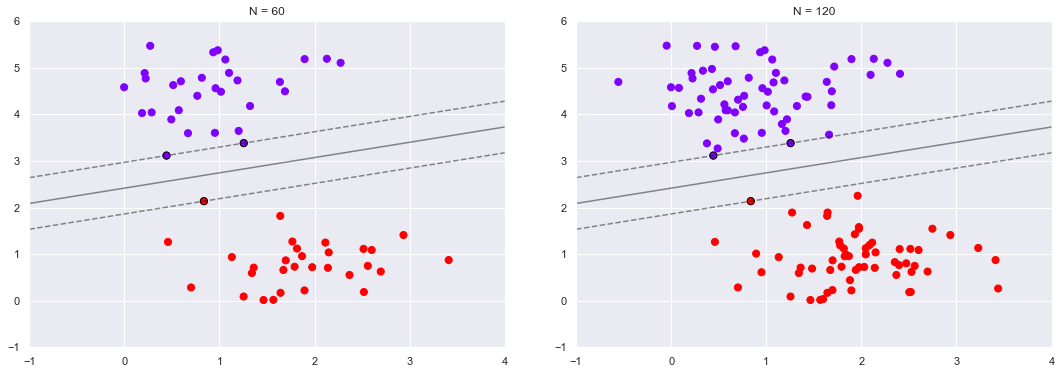

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.15)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [40]:
from ipywidgets import interact,fixed
interact(plot_svm , N=[10,20,50,200,1000,5000] , ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 50, 200, 1000, 5000), value=10), Output()), _…

<function __main__.plot_svm(N=1, ax=None)>

### Kernel SVM

In [154]:
from sklearn.datasets.samples_generator import make_circles
X , y = make_circles(100,factor=0.1,noise=0.15)
clf=SVC(kernel='linear').fit(X,y)

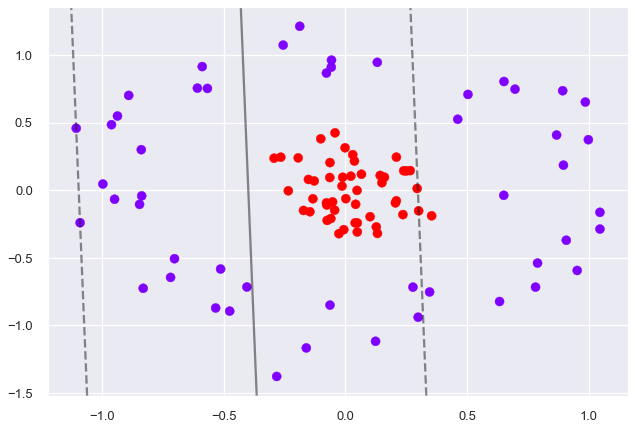

In [155]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
plot_SVC_decision(clf,plot_support=False)

#### 3d

Text(0.5, 0, 'r')

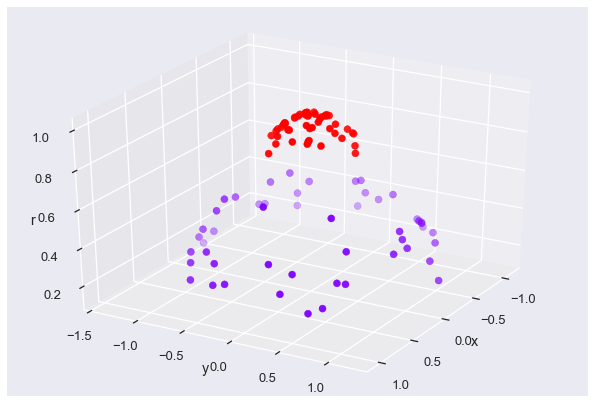

In [156]:
from mpl_toolkits.mplot3d import Axes3D 
r = np.exp(-(X ** 2).sum(1))
ax=plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
ax.view_init(30, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

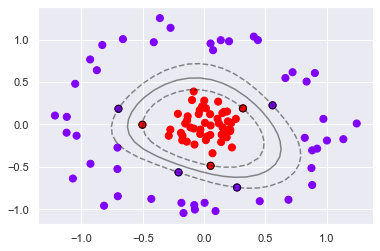

In [44]:
clf = SVC(kernel = 'rbf',C=1E6)
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_SVC_decision(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening margins

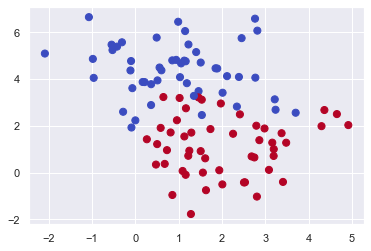

In [45]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

Text(0.5, 1.0, 'C = 0.1')

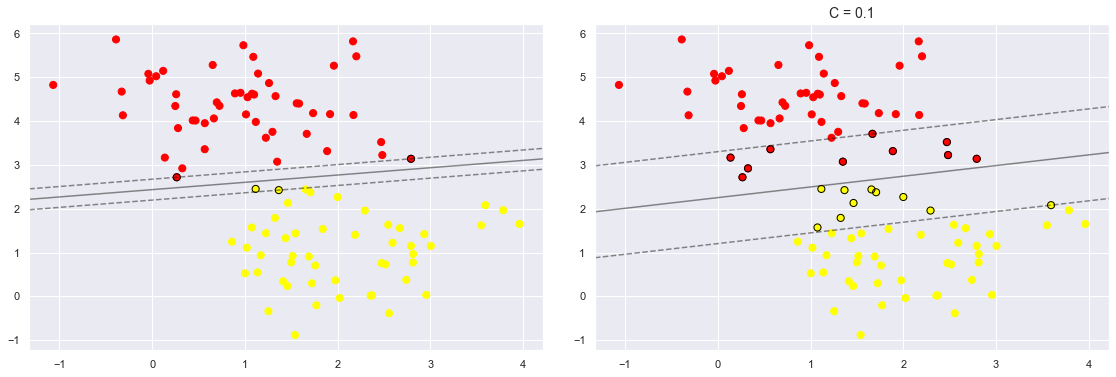

In [46]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=1, wspace=0.1)


for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_SVC_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');
axi.set_title('C = {0:.1f}'.format(C), size=14)

### Example: Face Recognition

In [47]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [48]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [49]:
faces.data[0]

array([138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
         1.6666666 ,   0.33333334], dtype=float32)

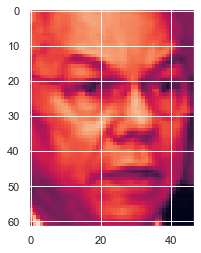

In [50]:
plt.imshow(faces.images[0])

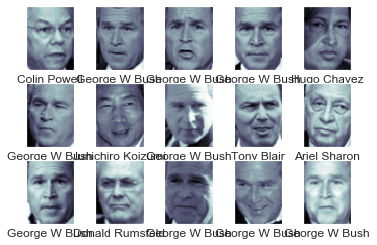

In [51]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [52]:
faces.images[0].shape

(62, 47)

In [53]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [54]:
pca = PCA(n_components=150, whiten=True, random_state=42)

In [55]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [56]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , ytrain , ytest = train_test_split(faces.data,faces.target,random_state=42)

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid ={'svc__C':[1,5,10,50],
            'svc__gamma':[0.0001,0.0005,0.001,0.005]}

grid = GridSearchCV(model,param_grid)

In [58]:
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

Wall time: 28.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [59]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

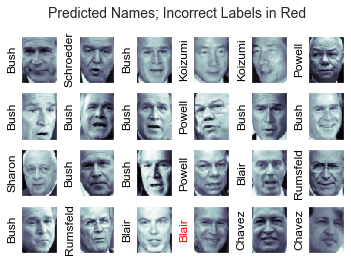

In [60]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [61]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



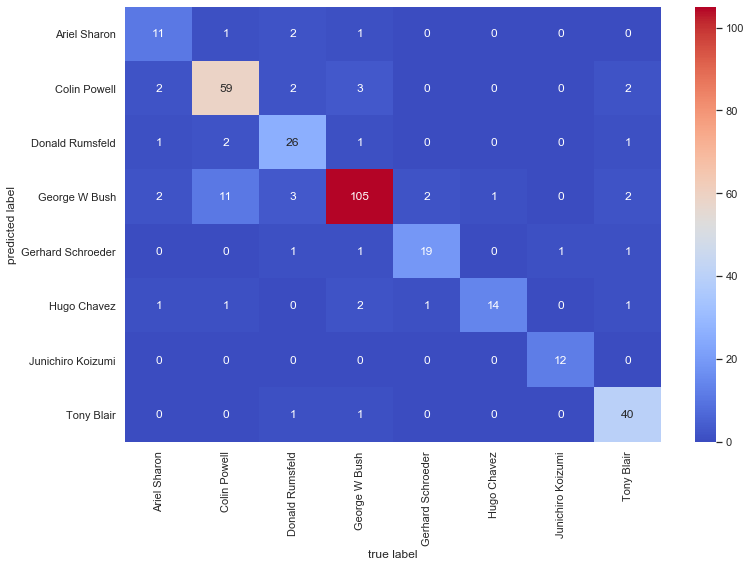

In [62]:
plt.figure(figsize=(12,8))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat,cmap='coolwarm',annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [63]:
accuracy_score(ytest,yfit)

0.8486646884272997

# Decision Trees and Random Forests

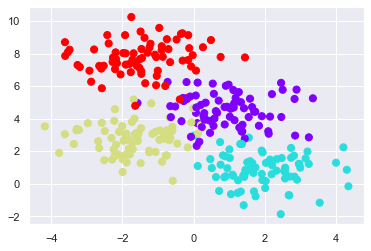

In [64]:
from sklearn.datasets import make_blobs
X , y = make_blobs(n_samples = 300 , centers = 4, random_state=0, cluster_std = 1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [66]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap=cmap, clim=(y.min(), y.max()),zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'clim'
  del sys.path[0]


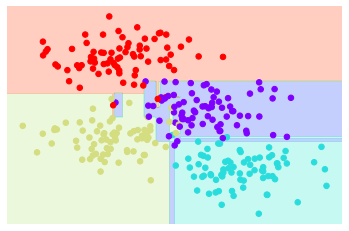

In [67]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### Random Forests

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(base_estimator=tree , n_estimators=100 , max_samples =0.8, random_state=1)

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'clim'
  del sys.path[0]


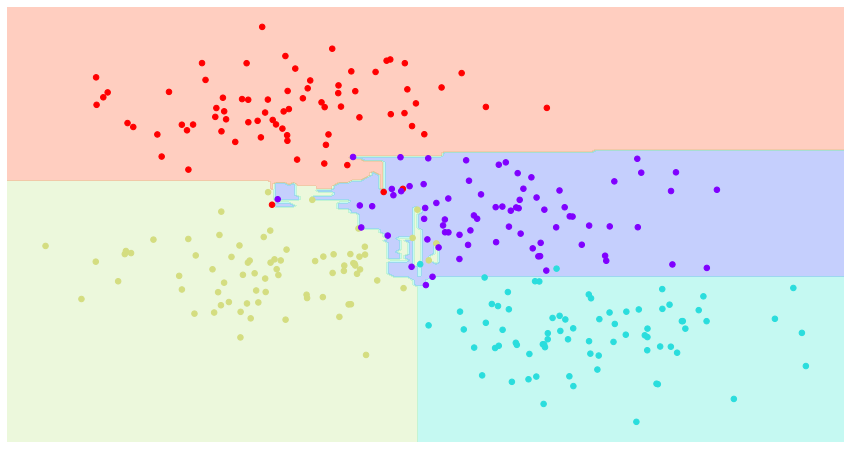

In [69]:
plt.figure(figsize=(15,8))
bag.fit(X,y)
visualize_classifier(bag,X,y)

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'clim'
  del sys.path[0]


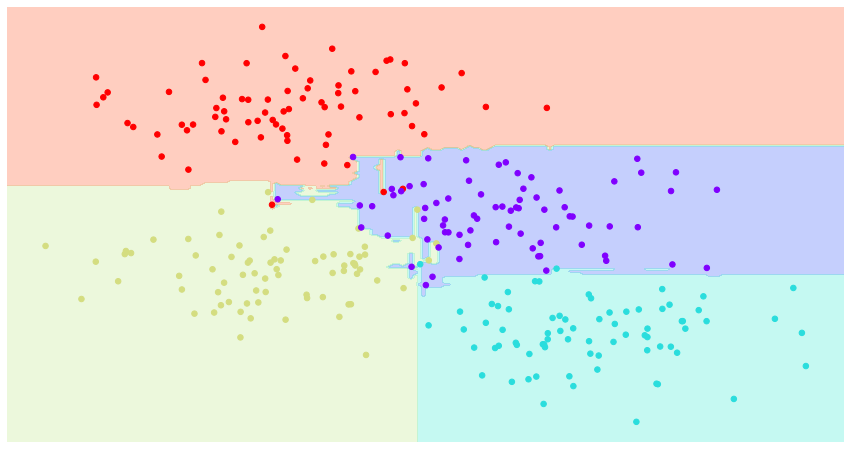

In [70]:
plt.figure(figsize=(15,8))
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,random_state=1)
visualize_classifier(model,X,y)

### Random Forest Regression

In [71]:
rng=np.random.RandomState(42)
X = 10 * rng.rand(200)

In [72]:
def model(X,sigma=0.3):
    fast_oscillation = np.sin(5 * X)
    slow_oscillation = np.sin(0.5 * X)
    noise = sigma * rng.randn(len(X))
    return slow_oscillation +fast_oscillation +noise

In [73]:
y = model(X)

<ErrorbarContainer object of 3 artists>

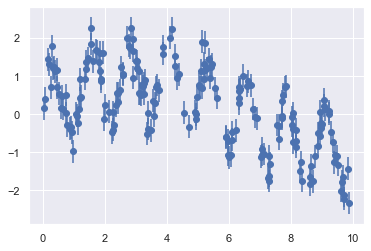

In [74]:
plt.errorbar(X,y,0.3,fmt='o')

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)

In [76]:
forest.fit(X[:,np.newaxis],y)

RandomForestRegressor(n_estimators=200)

In [77]:
xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,np.newaxis])
ytrue = model(xfit)

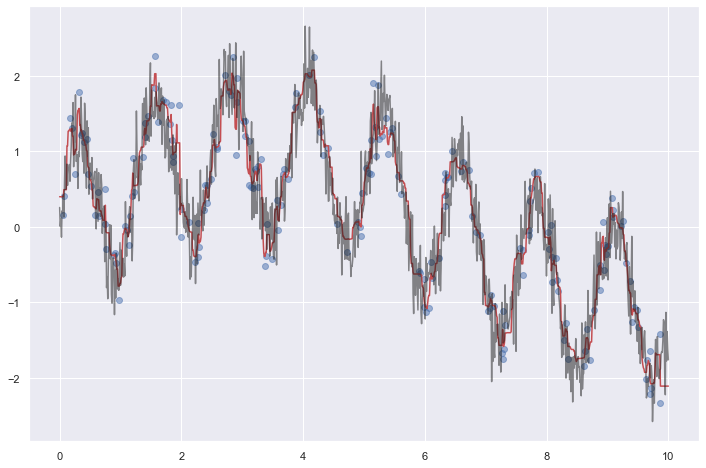

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(X, y,  alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Random Forest for Classifying Digits

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()

In [80]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

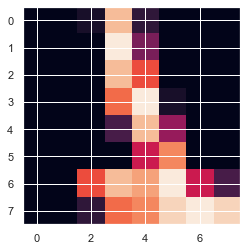

In [81]:
plt.imshow(digits.images[1000])

In [82]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [83]:
df = pd.DataFrame(data=digits['data'])
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


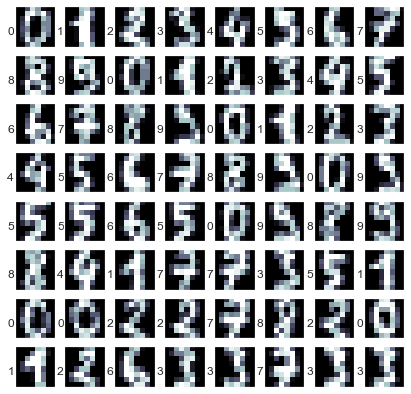

In [84]:

fig,ax = plt.subplots(8,8)
fig.set_figheight(7)
fig.set_figwidth(7)
xticks=[]
yticks=[]
for i,axi in enumerate(ax.flat):
    axi.imshow(digits['images'][i],cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=(digits.target_names[digits.target[i]]))
    axi.xaxis.set_label_coords(-0.1, 0.5)
    

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.25, random_state=0)

In [86]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
predictions = model.predict(X_test)

In [88]:
from sklearn.metrics import classification_report , confusion_matrix  ,  accuracy_score
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.91      1.00      0.95        40
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



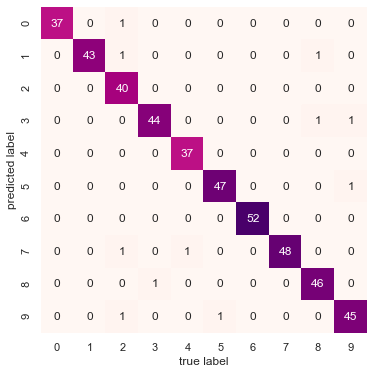

In [89]:
plt.figure(figsize=(9,6))
mat=confusion_matrix(y_test,predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap='RdPu')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Principle Compoent Analysis

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

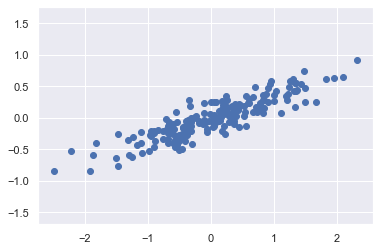

In [91]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [92]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [93]:
print('components',pca.components_)

components [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [94]:
print('explained variance',pca.explained_variance_)

explained variance [0.7625315 0.0184779]


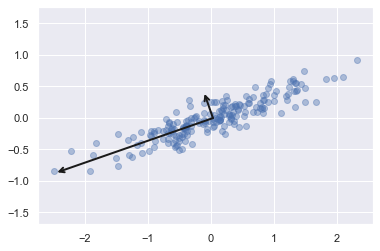

In [95]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0,color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

#### PCA as dimensionality reduction

In [96]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [97]:
print('original shape',X.shape)
print('transformed shape',X_pca.shape)

original shape (200, 2)
transformed shape (200, 1)


In [98]:
X_new = pca.inverse_transform(X_pca)

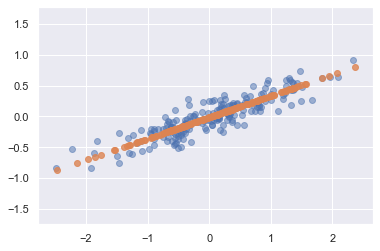

In [99]:
plt.scatter(X[:,0],X[:,1],alpha=0.5)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal');

#### PCA for visualization: Handwritten digits

In [100]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [101]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


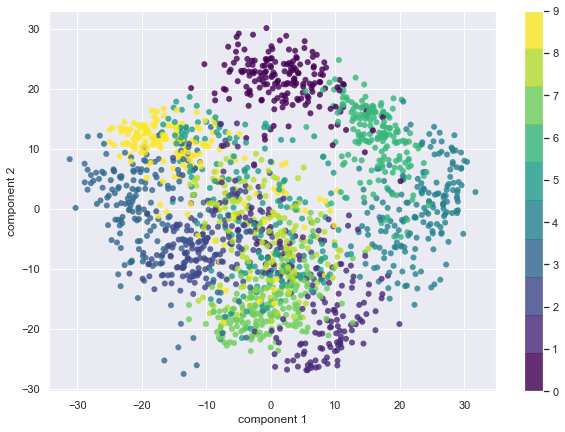

In [102]:
plt.figure(figsize=(10,7))
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

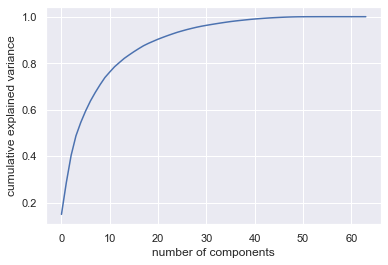

In [103]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### PCA as Noise Filtering

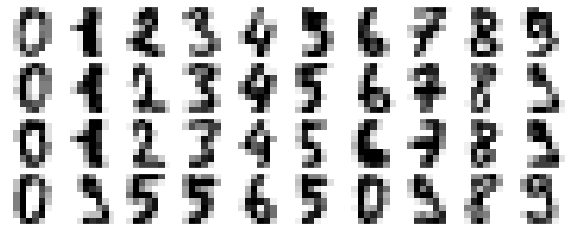

In [104]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
        ax.set(xticks=[], yticks=[])        
plot_digits(digits.data)

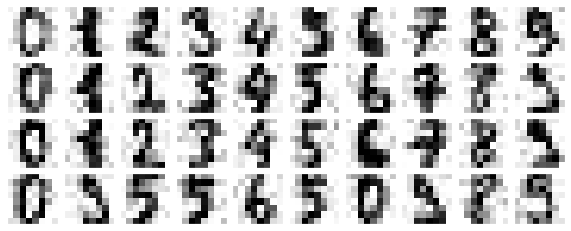

In [105]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 2)
plot_digits(noisy)

In [106]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

6

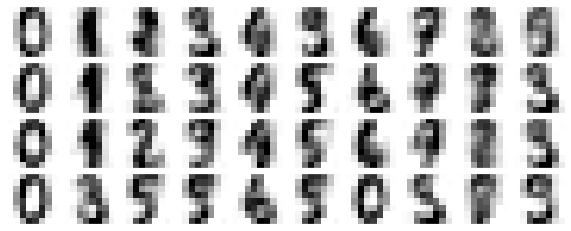

In [107]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Example: Eigenfaces

In [108]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [109]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

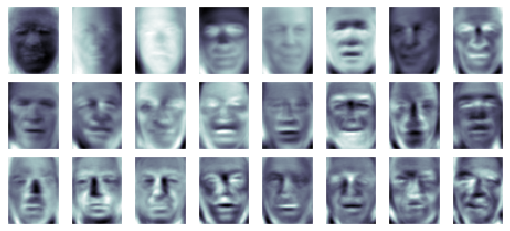

In [110]:
fig , axes = plt.subplots(3,8,figsize=(9,4),subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

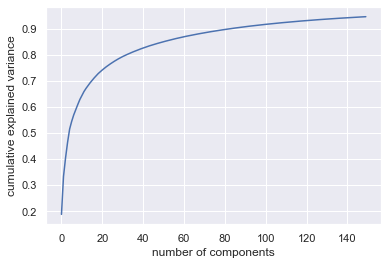

In [111]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [112]:
# Compute the components and projected faces
pca = RandomizedPCA(150)
pca_fit = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

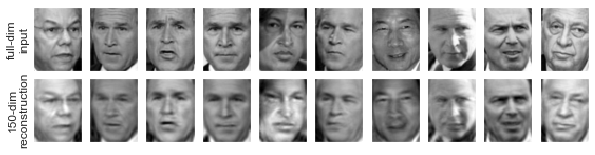

In [113]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Manifold Learning

1. multidimensional scaling (MDS)
2. locally linear embedding (LLE),
3. isometric mapping (Isomap).

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [115]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]
    

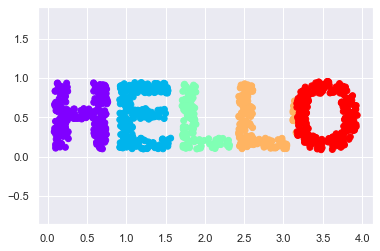

In [116]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [117]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

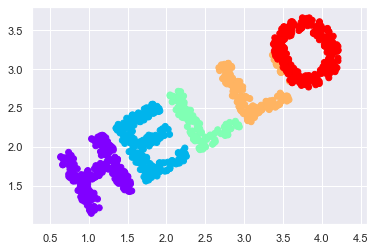

In [118]:
X2 = rotate(X, 30) + 1
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [119]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

In [120]:
X.shape

(1000, 2)

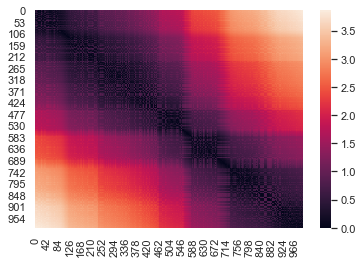

In [121]:
sns.heatmap(D)

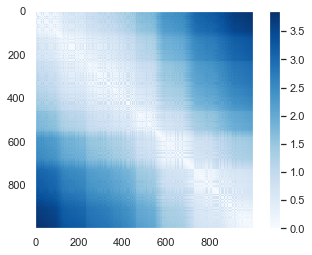

In [122]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [123]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

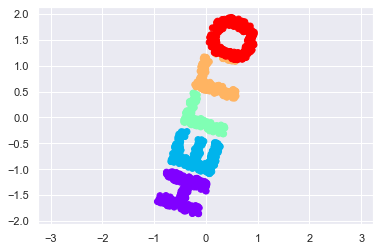

In [124]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### MDS as Manifold Learning

In [125]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

In [126]:
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

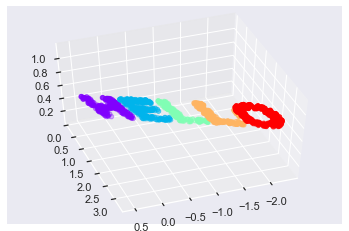

In [127]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],**colorize)
ax.view_init(azim=70, elev=50)

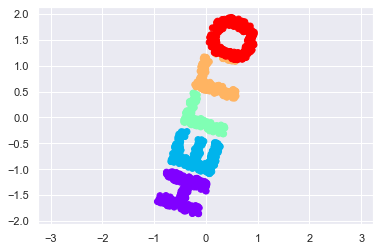

In [128]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

### Nonlinear Embeddings: Where MDS Fails

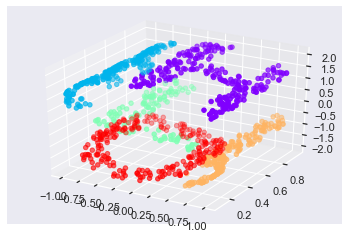

In [129]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],**colorize);

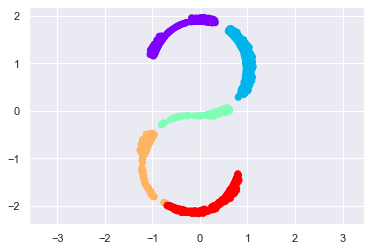

In [130]:
from sklearn.manifold import MDS
model = MDS(n_components=2,random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

### Nonlinear Manifolds: Locally Linear Embedding

In [131]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_components=2,n_neighbors=100,method='modified',eigen_solver='dense')
out = model.fit_transform(XS)

(0.15, -0.15)

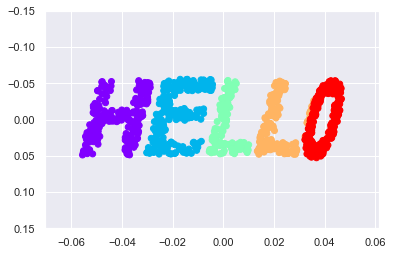

In [132]:
fig , ax = plt.subplots()
ax.scatter(out[:,0],out[:,1],**colorize)
ax.set_ylim(0.15,-0.15)


### Example: Isomap on Faces

In [133]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

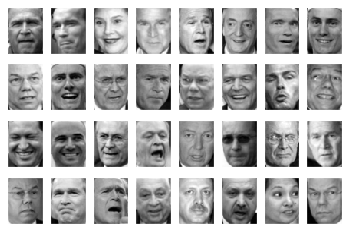

In [134]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

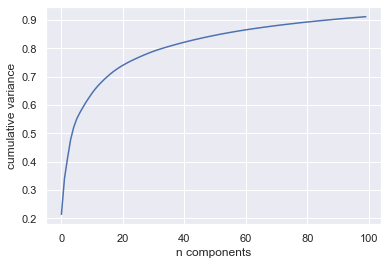

In [135]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [136]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [137]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
            # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap),proj[i])
            ax.add_artist(imagebox)
                

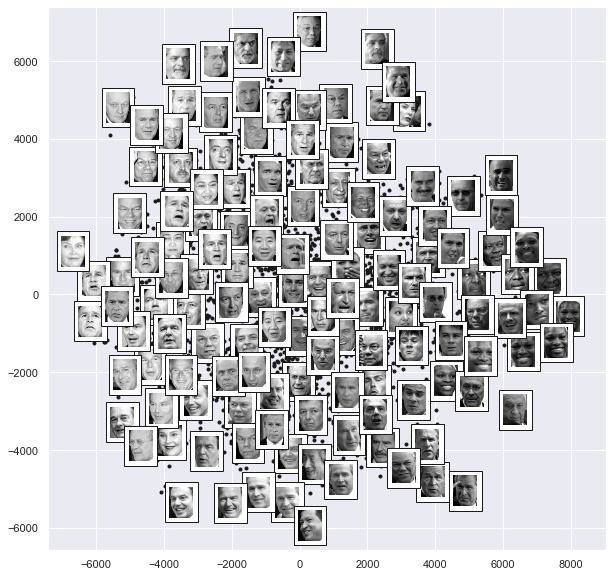

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,model=Isomap(n_components=2),images=faces.images[:, ::2, ::2])

### Example: Visualizing Structure in Digits

In [139]:
import pandas as pd
minst = pd.read_csv('files_csv/mnist_train.csv')
minst.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
minst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


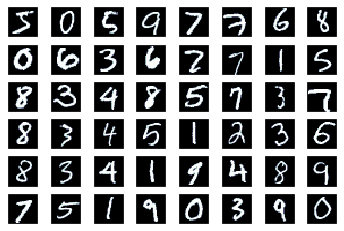

In [141]:
fig , ax = plt.subplots(6,8,subplot_kw=dict(xticks=[],yticks=[]))
for i,axi in enumerate(ax.flat):
    axi.imshow(np.array(minst.iloc[1000*i,1:]).reshape(28,28),cmap='bone')

In [142]:
data = minst.iloc[::30,1:]
target = minst.iloc[::30,0]

In [143]:
model = Isomap(n_components=2)
proj=model.fit_transform(data)

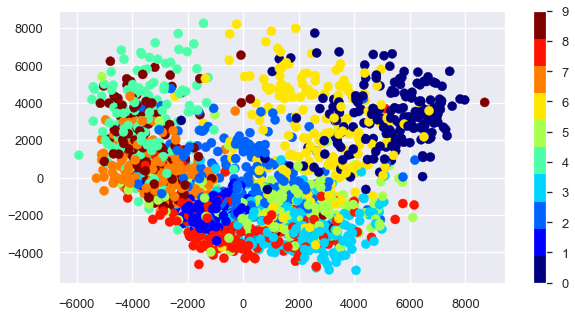

In [144]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-talk')

plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))

In [145]:
sub_data = minst[minst.iloc[:,0]==5][::5]
sub_data=(sub_data.iloc[:,1:]).to_numpy()
sub_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

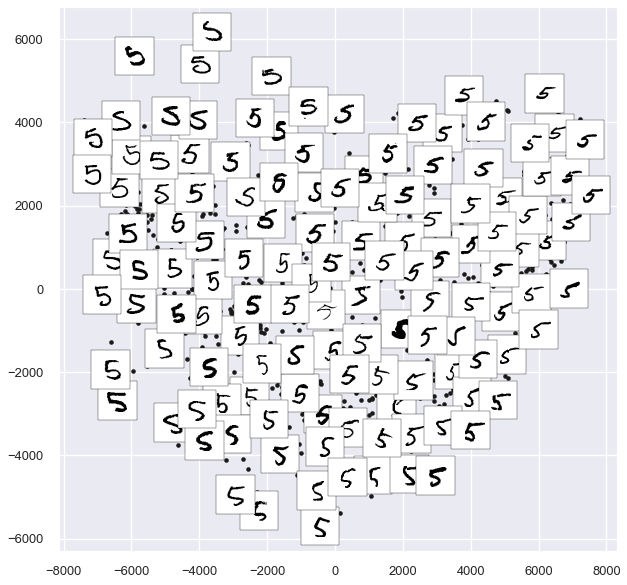

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_components=2,n_neighbors=5,eigen_solver='dense')
plot_components(sub_data, model, images=sub_data.reshape((-1, 28, 28)),ax=ax, thumb_frac=0.05, cmap='gray_r')

# DONE